In [134]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("anandshaw2001/netflix-movies-and-tv-shows")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\spagh\.cache\kagglehub\datasets\anandshaw2001\netflix-movies-and-tv-shows\versions\1


In [164]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [165]:
# Get the full path to the dataset file
csv_file = os.path.join(path, "netflix_titles.csv") 

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_file)

# Display the first few rows
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [166]:
# Display a summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [167]:
# Generates descriptive statistics of the DataFrame
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [168]:
# Display DataFrame columns
df_columns = df.columns
print("DataFrame Columns:")
print(df_columns)

DataFrame Columns:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [169]:
# Calculate percentage vals and create the percentage column
release_year_counts = df["release_year"].value_counts().to_frame(name="Count")
release_year_counts["Percentage %"] = (release_year_counts["Count"] / len(df)) * 100

# Display results sorted in descending order
release_year_counts = release_year_counts.sort_values(by="Count", ascending=False)

# Display DataFrame
print("Release Year Distribution:")
print(release_year_counts)

Release Year Distribution:
              Count  Percentage %
release_year                     
2018           1147     13.023731
2017           1032     11.717952
2019           1030     11.695242
2020            953     10.820938
2016            902     10.241853
...             ...           ...
1961              1      0.011355
1925              1      0.011355
1959              1      0.011355
1966              1      0.011355
1947              1      0.011355

[74 rows x 2 columns]


## Data Cleansing

#### Lets check for any outliers in the year column

In [170]:
# Display missing values as a percent to see if any columns need to be dropped
missing_data = df.isnull().sum().to_frame(name="Total Missing")
missing_data["Missing %"] = (missing_data["Total Missing"] / len(df)) * 100 

# Display results sorted by highest missing percentage
missing_data = missing_data[missing_data["Total Missing"] > 0]
missing_data = missing_data.sort_values(by="Missing %", ascending=False)

# Display DataFrame
print("Missing Values Summary:")
print(missing_data)

Missing Values Summary:
            Total Missing  Missing %
director             2634  29.908028
country               831   9.435676
cast                  825   9.367549
date_added             10   0.113546
rating                  4   0.045418
duration                3   0.034064


#### One out of approximately every three data points has a missing director so lets fill with Unknown
<blockquote>This could also be done for cast and country</blockquote>

In [171]:
# Fill or drop missing values based on your need
df.fillna({"cast": "Unknown", "country": "Unknown", "director": "Unknown", "rating": "Unknown"}, inplace=True)
df.dropna(subset=["date_added"], inplace=True)

#### Are there any duplicates?

In [172]:
# Check for duplicates
print("Duplicates Found:", df.duplicated().sum())

# Drop duplicates if necessary
# df.drop_duplicates(inplace=True)

Duplicates Found: 0


#### Are there any leading, multiple between, and trailing spaces?

In [173]:
# Summary function of leading, between, and trailing spaces
def check_extra_spaces(df):
    space_summary = []
    
    # Only check for spaces in text columns
    for col in df.select_dtypes(include=["object"]):  
        total_rows = len(df)

        # Count issues
        leading_spaces = df[col].astype(str).str.match(r"^\s+").sum()
        trailing_spaces = df[col].astype(str).str.match(r"\s+$").sum()
        multiple_spaces = df[col].astype(str).str.contains(r"\s{2,}", regex=True).sum()

        # Store results
        space_summary.append({
            "Column": col,
            "Leading Spaces": leading_spaces,
            "Trailing Spaces": trailing_spaces,
            "Multiple Spaces (Between Words)": multiple_spaces,
            "Total Issues": leading_spaces + trailing_spaces + multiple_spaces,
            "Affected %": round(((leading_spaces + trailing_spaces + multiple_spaces) / total_rows) * 100, 2)
        })

    # Convert the summary into a DataFrame
    summary_df = pd.DataFrame(space_summary)

    return summary_df

# Display the summary
summary = check_extra_spaces(df)
print(summary)

         Column  Leading Spaces  Trailing Spaces  \
0       show_id               0                0   
1          type               0                0   
2         title               0                0   
3      director               0                0   
4          cast               0                0   
5       country               0                0   
6    date_added              88                0   
7        rating               0                0   
8      duration               0                0   
9     listed_in               0                0   
10  description               0                0   

    Multiple Spaces (Between Words)  Total Issues  Affected %  
0                                 0             0        0.00  
1                                 0             0        0.00  
2                                 3             3        0.03  
3                                 0             0        0.00  
4                                 7             7      

#### Seeing that there are, let's delete those unwanted spaces and verify that they are gone.

In [174]:
# Cleaning extra spaces function
def clean_extra_spaces(df):
    # Removes leading, trailing, and multiple spaces in all text-based columns.
    for col in df.select_dtypes(include=["object"]):  # Only clean strings first
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].str.replace(r"\s{2,}", " ", regex=True)
    return df

extra_spaces_df = check_extra_spaces(df)
summary = check_extra_spaces(extra_spaces_df)

print(summary)

   Column  Leading Spaces  Trailing Spaces  Multiple Spaces (Between Words)  \
0  Column               0                0                                0   

   Total Issues  Affected %  
0             0         0.0  


In [175]:
# Cleaning extra spaces function
def clean_extra_spaces(df):
    # Removes leading, trailing, and multiple spaces in all text-based columns.
    for col in df.select_dtypes(include=["object"]):  # Only clean strings first
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].str.replace(r"\s{2,}", " ", regex=True)
    return df

extra_spaces_df = check_extra_spaces(df)
summary = check_extra_spaces(extra_spaces_df)

print(summary)

   Column  Leading Spaces  Trailing Spaces  Multiple Spaces (Between Words)  \
0  Column               0                0                                0   

   Total Issues  Affected %  
0             0         0.0  


## Check country columns to see if there are any anomalies
<blockquote>Apparently theres a "United States" column and a "United States," column</blockquote>

In [ ]:
# Unique values in the country column
df["country"].unique()

# Check if United States, exists in the country column
if "United States," in df["country"].values:
    print("Present")
else:
    print("Missing")
    
# Let's drop the column and create a new DataFrame
df = df[df["country"] != "United States,"]    
    

Present


#### Convert the date_added column to a datetime object and verify that all the values are in a valid format
<blockquote>We need to do this in order to visualize datettime data later on</blockquote>

In [177]:
df["date_added"] = pd.to_datetime(df["date_added"].str.lstrip(), format="%B %d, %Y", errors="raise")
df["date_added"].isna().sum()

np.int64(0)

#### Do all of the values in content rating make sense?

In [178]:
# View all unique values from the rating column
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Unknown', 'TV-Y7-FV', 'UR'], dtype=object)

<blockquote>Looks like we have ratings such as 66 min, 74 min, 84 min, and Unknown</blockquote>
<blockquote>Lets look at those rows specifically to identify the quality of the data</blockquote>

In [179]:
# Filter the DataFrame
filtered_df = df[df['rating'].isin(['66 min', '74 min', '84 min', 'Unknown'])]

# Display DataFrame
print(filtered_df)

     show_id     type                                              title  \
5541   s5542    Movie                                    Louis C.K. 2017   
5794   s5795    Movie                              Louis C.K.: Hilarious   
5813   s5814    Movie               Louis C.K.: Live at the Comedy Store   
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   
7537   s7538    Movie                               My Honor Was Loyalty   

             director                                               cast  \
5541       Louis C.K.                                         Louis C.K.   
5794       Louis C.K.                                         Louis C.K.   
5813       Louis C.K.                                         Louis C.K.   
5989          Unknown                        Oprah Winfrey, Ava DuVernay   
6827       

<blockquote>Seems like the Louis C.K. comedy specials ratings should be moved to the duration column</blockquote>
<blockquote>We can safely asume they are TV-MA</blockquote>

In [ ]:
# Mask for incorrect rating
mask = df["rating"].isin(["66 min", "74 min", "84 min"])

# Move ratings to corresponding duration column
df.loc[mask, "duration"] = df.loc[mask, "rating"]

# Replace the rating values with "TV-MA"
df.loc[mask, "rating"] = "TV-MA"

#### Let's see how many unique values are in the listed in category

In [181]:
df["listed_in"].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

<blockquote>We will have to convert the values into a list and explode them in order to obtain the counts </blockquote>

In [ ]:
# Split the listed_in column into lists
genres_series = df["listed_in"].str.split(', ')

# Explode the list so each genre gets its own row
exploded_genres = genres_series.explode()

# Count the frequency of each genre
genre_counts = exploded_genres.value_counts().sort_values(ascending=True)

print(genre_counts)

listed_in
TV Shows                          16
Classic & Cult TV                 26
Stand-Up Comedy & Talk Shows      56
TV Thrillers                      57
Movies                            57
Faith & Spirituality              65
Teen TV Shows                     69
Cult Movies                       71
Anime Features                    71
TV Horror                         75
TV Sci-Fi & Fantasy               83
Science & Nature TV               92
TV Mysteries                      98
LGBTQ Movies                     102
Classic Movies                   116
Korean TV Shows                  151
TV Action & Adventure            167
Spanish-Language TV Shows        173
Anime Series                     175
Sports Movies                    219
Sci-Fi & Fantasy                 243
British TV Shows                 252
Reality TV                       255
Stand-Up Comedy                  343
Horror Movies                    357
Romantic TV Shows                370
Music & Musicals            

## Data Visualization

#### Top 10 Content Producing Countries

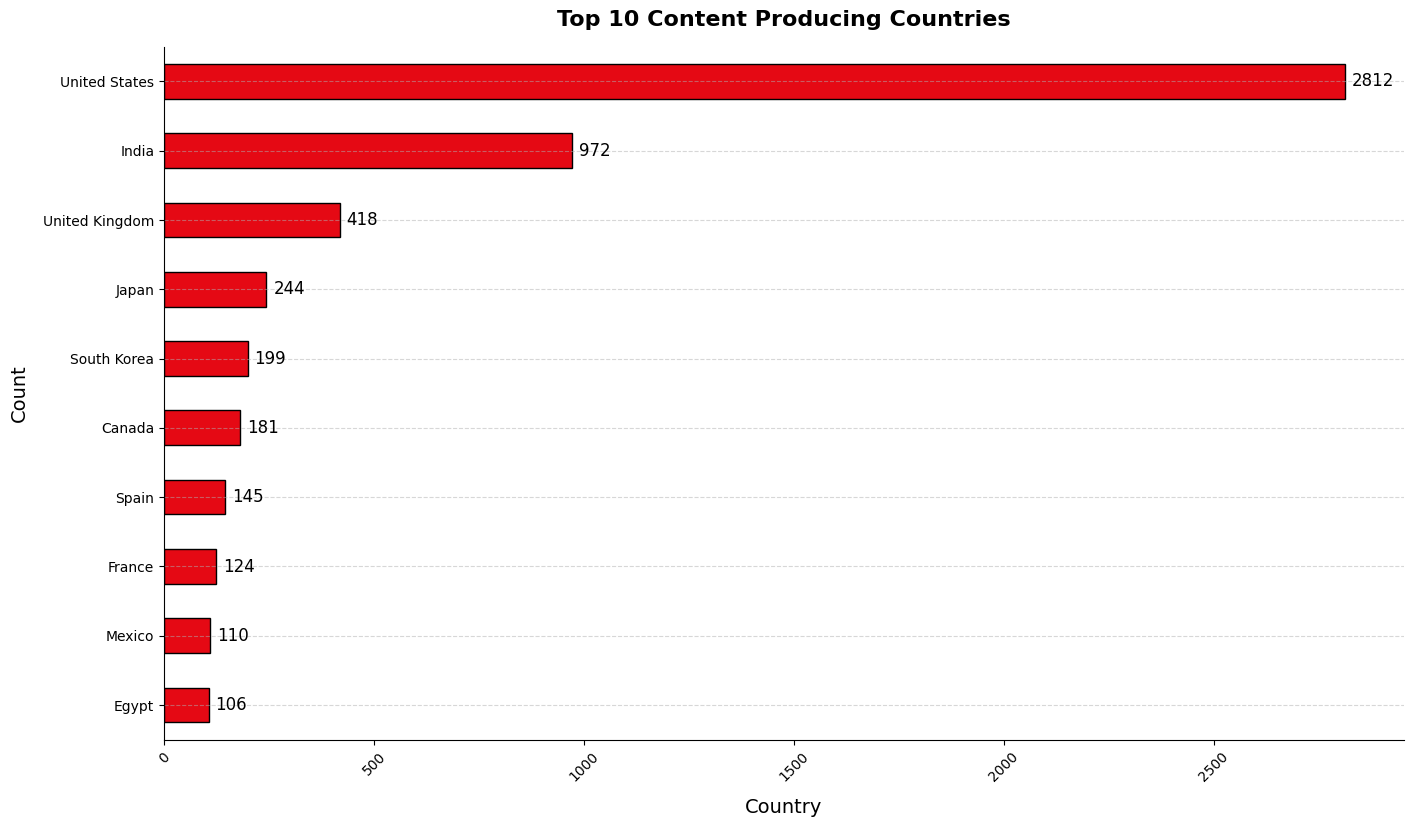

In [183]:
# Chart Size
plt.figure(figsize=(16, 9))

# Filter Unknown countries
df_filtered = df[df["country"] != "Unknown"]

# Bar Chart
bar = df_filtered["country"].value_counts().head(10).sort_values(ascending=True).plot(kind="barh", color="#E50914", edgecolor="black")

# Titles and labels
plt.title("Top 10 Content Producing Countries", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Country", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

# Angled ticks
plt.xticks(rotation=45)

# Gridlines
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add count labels on top of bars
for p in bar.patches:
    bar.annotate(
        f"{p.get_width()}", 
        (p.get_width(), p.get_y() + p.get_height() / 2), 
        ha="left", va="center", fontsize=12, fontweight="normal",
        xytext=(5, 0), textcoords='offset points'  # Offset text by 5 points to the right
    )

# Remove top and right spines
sns.despine()

# Show plot
plt.show()

#### Year Release Distribution

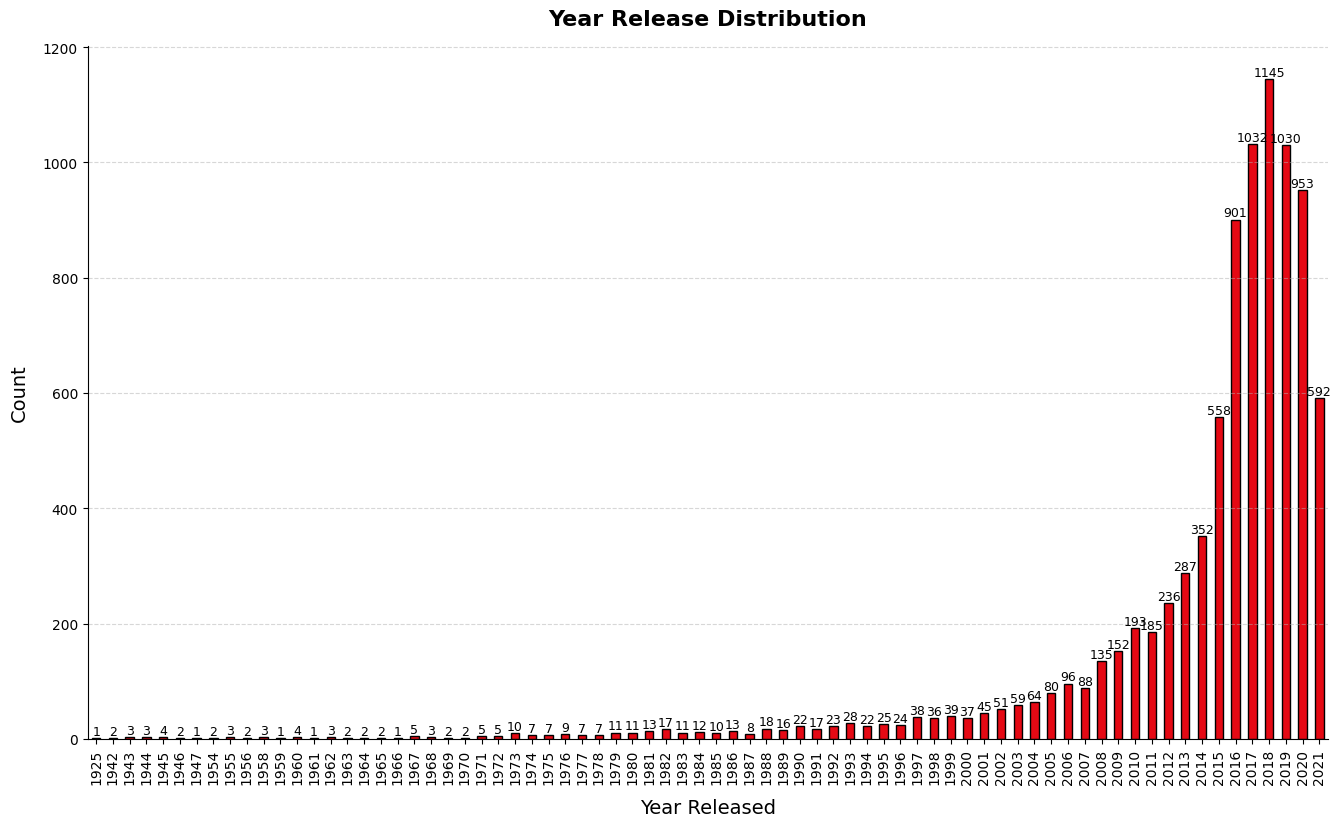

In [184]:
# Chart Size
plt.figure(figsize=(16, 9))

# Barchart
bar = df["release_year"].value_counts().sort_index().plot(
    kind="bar", color="#E50914", edgecolor="black",
)

# Titles and labels
plt.title("Year Release Distribution", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Year Released", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

# Gridlines
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add count labels on top of bars
for p in bar.patches:
    bar.annotate(
        f"{p.get_height()}", 
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha="center", va="bottom", fontsize=9, fontweight="normal", 
    )

# Remove top and right spines
sns.despine()

# Show plot
plt.show()

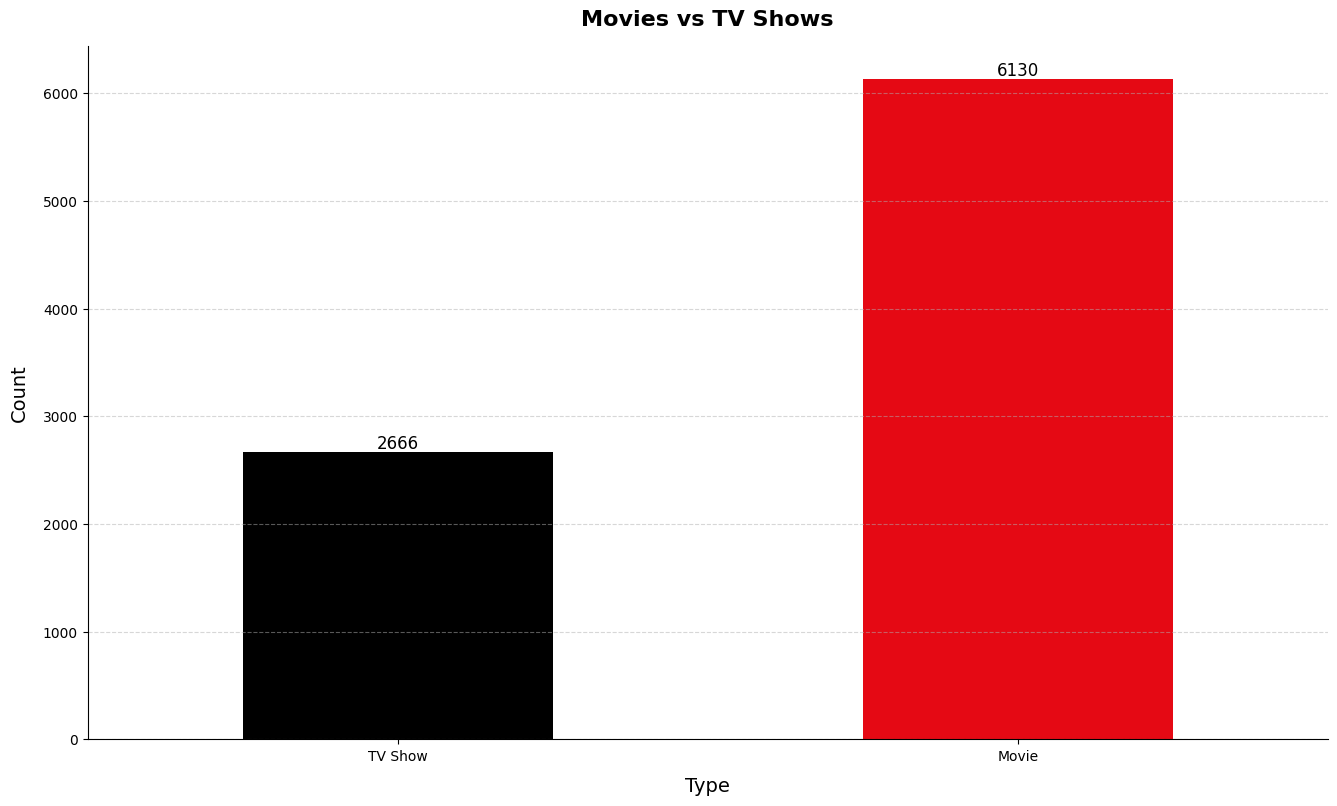

In [185]:
# Chart Size
plt.figure(figsize=(16, 9))

# Bar Chart
bar = df["type"].value_counts().sort_values(ascending=True).plot(kind="bar", color=["black", "#E50914"])

# Titles and labels
plt.title("Movies vs TV Shows", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Type", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

# Horizontal ticks
plt.xticks(rotation=0)

# Gridlines
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add count labels on top of bars
for p in bar.patches:
    bar.annotate(
        f"{p.get_height()}", 
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha="center", va="bottom", fontsize=12, fontweight="normal", 
    )

# Remove top and right spines
sns.despine()

# Show plot
plt.show()

## Content Ratings Distribution

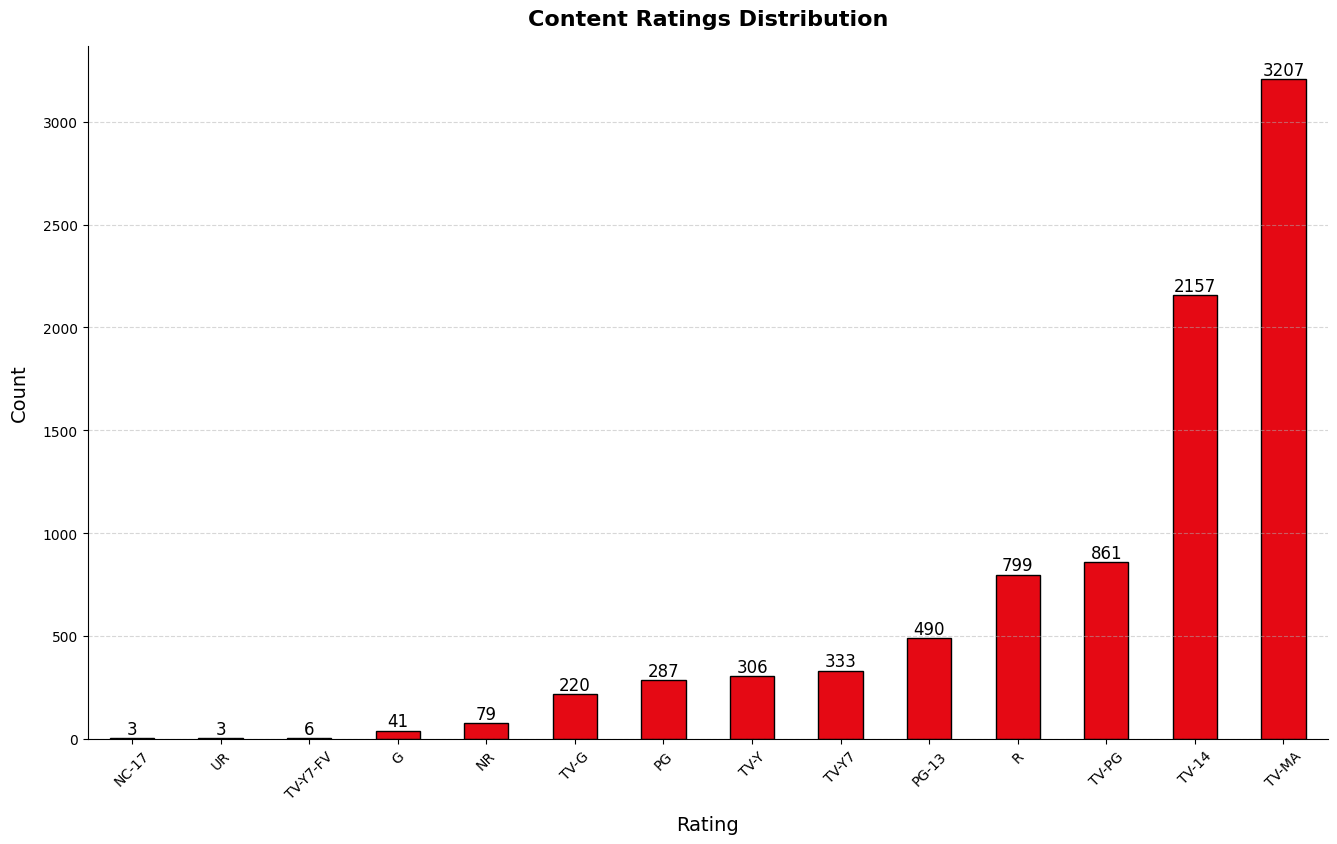

In [186]:
# Chart Size
plt.figure(figsize=(16, 9))

# Filter Unkown Values
filtered_df = df[df["rating"] != "Unknown"]

# Bar Chart
bar = filtered_df["rating"].value_counts().sort_values(ascending=True).plot(kind="bar",  color="#E50914", edgecolor="black")

# Titles and labels
plt.title("Content Ratings Distribution", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Rating", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

# Angled ticks
plt.xticks(rotation=45)

# Gridlines
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add count labels on top of bars
for p in bar.patches:
    bar.annotate(
        f"{p.get_height()}", 
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha="center", va="bottom", fontsize=12, fontweight="normal", 
    )
    
# Remove top and right spines
sns.despine()

# Show plot
plt.show()

## TV-MA Ratings Count by Country choropleth map

In [ ]:
# Filter the DataFrame to include only rows with 'TV-MA' ratings
tv_ma_df = df[df["rating"] == "TV-MA"]

# Split values, flatten the list, filter out empty strings, and get unique country names for only TV-MA ratings
unique_countries = set(country for countries in tv_ma_df["country"].dropna() for country in countries.split(", ") if country != 'United States,')

# Convert to sorted list
unique_countries_list = sorted(list(unique_countries))

# Display the unique countries with TV-MA counts
print(unique_countries_list)

['', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bangladesh', 'Belgium', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Czech Republic', 'Denmark', 'Egypt', 'Ethiopia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Poland,', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Senegal', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Thailan

In [ ]:
# Exploding the country column so that each country gets its own row
exploded_df = df.dropna(subset=["country"]).copy()
exploded_df["country"] = exploded_df["country"].str.split(", ")
exploded_df = exploded_df.explode("country").reset_index(drop=True)
exploded_df = exploded_df[exploded_df["country"] != 'United States,']

# Filter the dataframe to include only TV-MA ratings
tv_ma_df = exploded_df[exploded_df["rating"] == "TV-MA"]

# Count the occurrences of each unique country and its associated TV-MA rating
country_rating_counts = tv_ma_df.groupby("country")["rating"].value_counts().reset_index(name="count")

# Sort the results by country and count
country_rating_counts_sorted = country_rating_counts.sort_values(by=["country", "count"], ascending=[True, False])

# Display the result
country_rating_counts_sorted_list = list(country_rating_counts_sorted["count"])
print(country_rating_counts_sorted_list)

[1, 1, 1, 2, 1, 67, 1, 44, 6, 1, 46, 59, 1, 1, 2, 1, 107, 19, 34, 34, 2, 1, 8, 23, 33, 1, 5, 163, 79, 3, 2, 1, 34, 5, 5, 266, 18, 2, 17, 15, 47, 1, 101, 5, 2, 1, 1, 15, 1, 2, 4, 1, 1, 102, 1, 1, 2, 1, 1, 23, 10, 44, 17, 4, 1, 5, 34, 32, 1, 5, 1, 5, 7, 8, 2, 2, 3, 12, 1, 2, 28, 92, 170, 26, 7, 1, 36, 43, 68, 2, 10, 250, 2, 1102, 276, 9, 1, 3, 3, 1]


In [197]:
# Country-Count DataFrame
df_map = pd.DataFrame({
    "country": unique_countries_list,
    "count": country_rating_counts_sorted_list
})

# Choropleth map
fig = px.choropleth(
    df_map,
    locations="country",
    locationmode="country names",
    color="count",
    hover_name="country",
    color_continuous_scale="RdBu",
    title="TV-MA Ratings Count by Country"
)

fig.show()

## Top 10 Tagged Genres Distribution

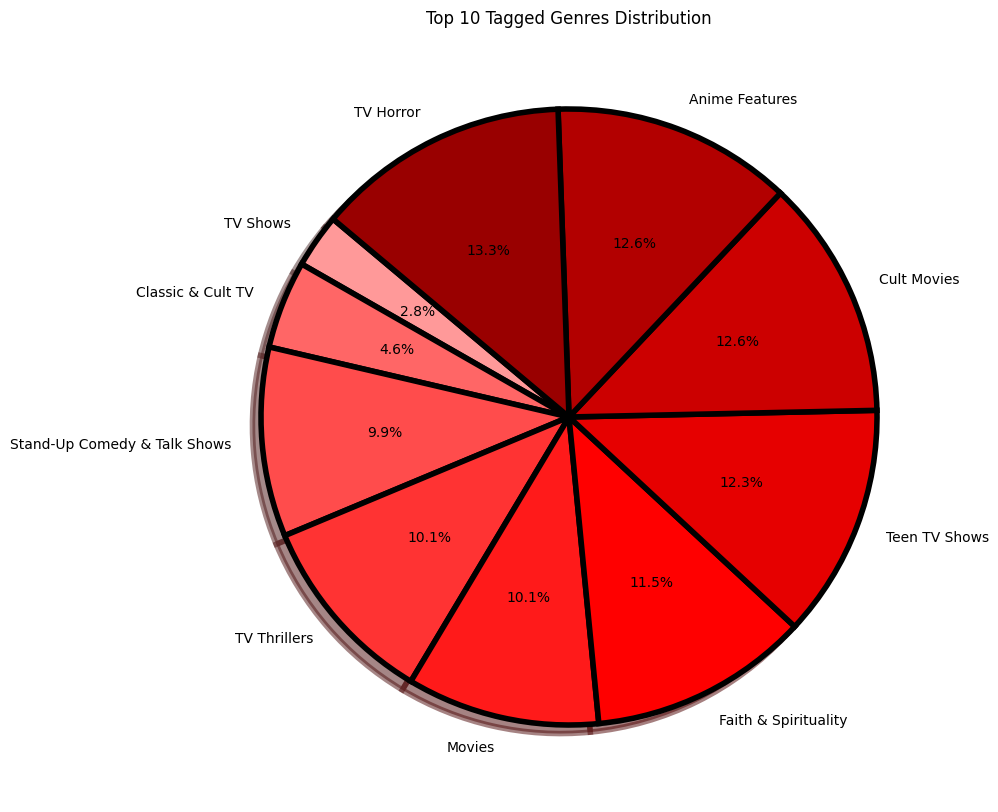

In [187]:
# Top 10 genres tagged
top_genres = genre_counts.head(10)

# Red shades
red_shades = ['#FF9999', '#FF6666', '#FF4C4C', '#FF3333', '#FF1A1A',
              '#FF0000', '#E60000', '#CC0000', '#B20000', '#990000']

# Chart Size
plt.figure(figsize=(10, 10))

# Pie Chart
top_genres.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True, colors=red_shades, ylabel="", wedgeprops={'edgecolor': 'black', 'linewidth': 4}, textprops={'weight': 'medium'} )

# Title
plt.title('Top 10 Tagged Genres Distribution')

# Show plot
plt.show()

## Number of Titles Added Per Month

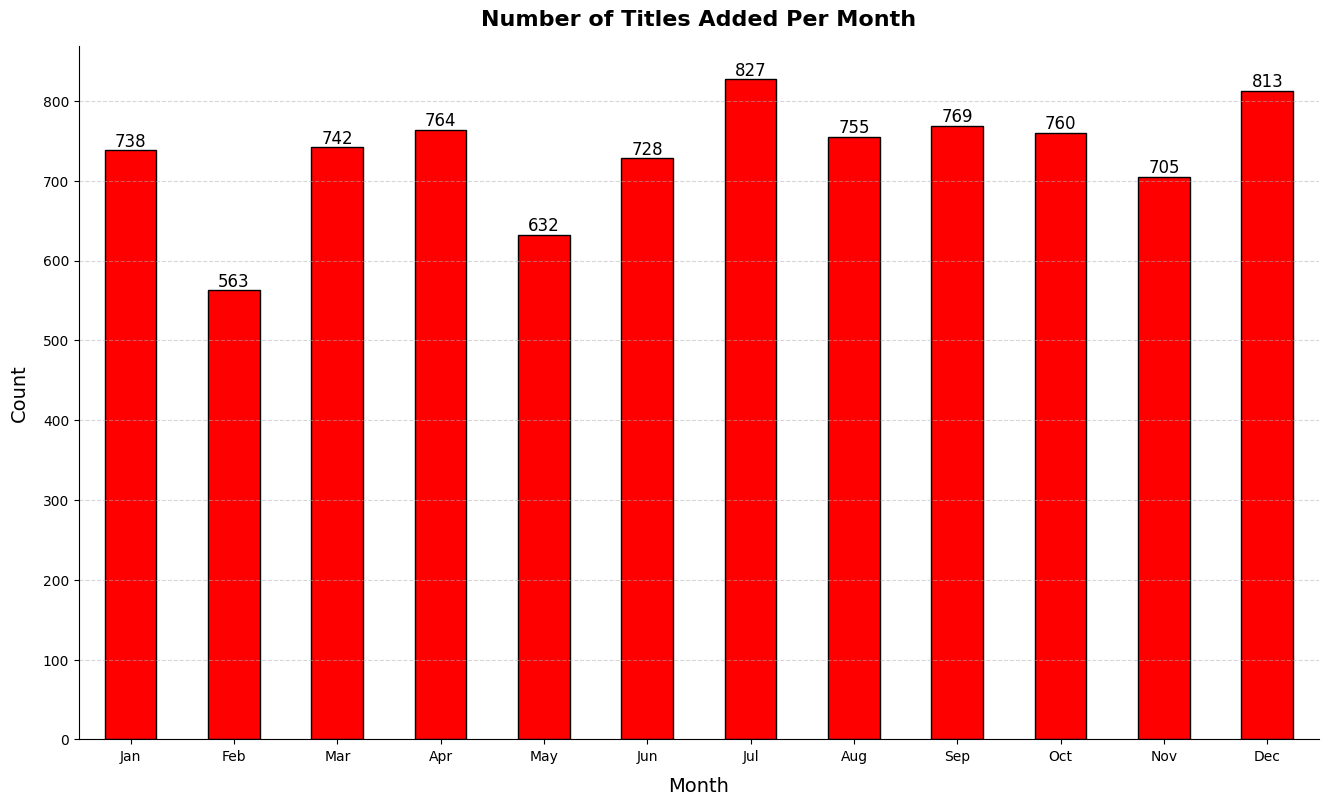

In [188]:
# Create month_added columns and a month to them
df["month_added"] = df["date_added"].dt.strftime('%b')

# This is how I want to order my chart Jan-Dec
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Chart Size
plt.figure(figsize=(16, 9))

# Convert the column into a categorical type in order to order by months
df['month_added'] = pd.Categorical(df['month_added'], categories=month_order, ordered=True)

# Bar Chart
bar = df["month_added"].value_counts().sort_index().plot(kind="bar", color="red", edgecolor="black")

# Titles and labels
plt.title("Number of Titles Added Per Month", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Month", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

# Ticks
plt.xticks(rotation=0)

# Gridlines
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add count labels on top of bars
for p in bar.patches:
    bar.annotate(
        f"{p.get_height()}", 
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha="center", va="bottom", fontsize=12, fontweight="normal", 
    )
    
# Remove top and right spines
sns.despine()

# Show plot
plt.show()

## Number of Titles Added Per Year

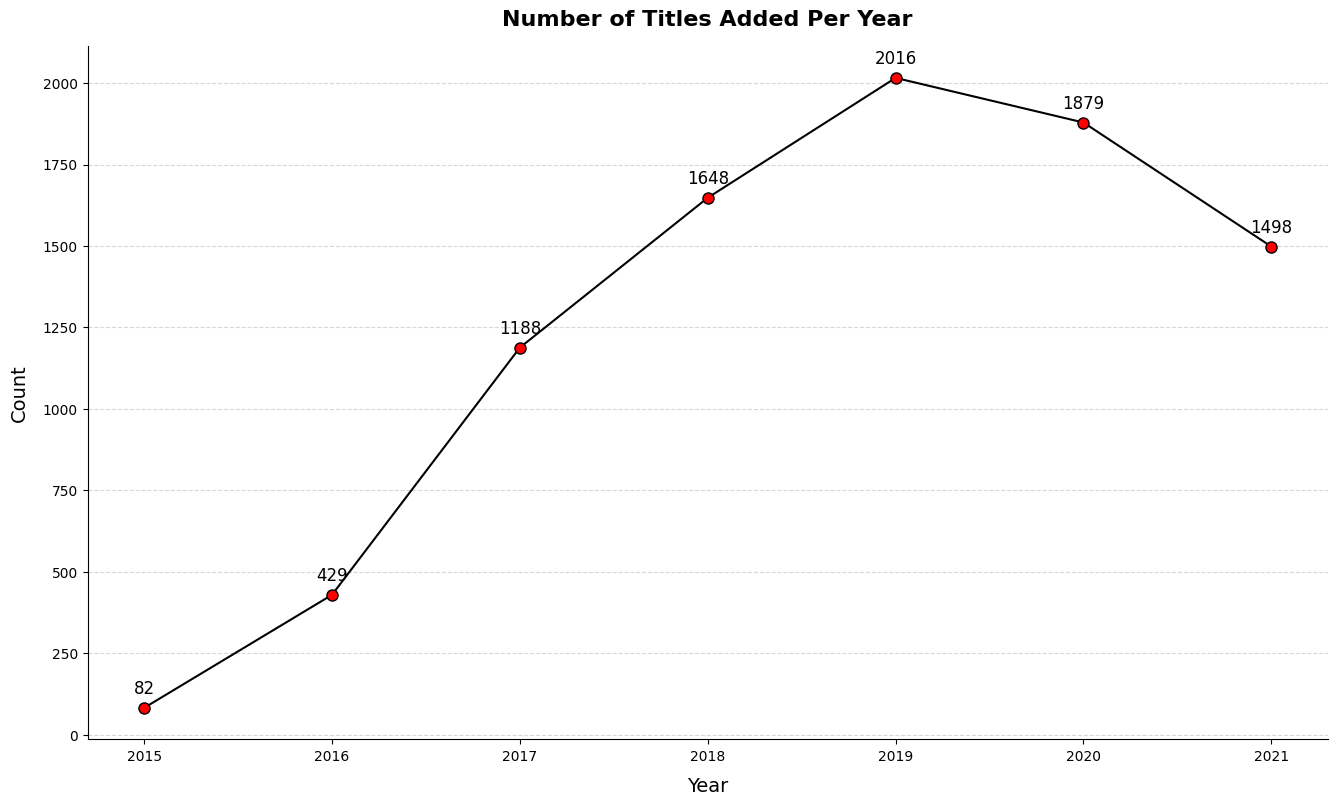

In [189]:
# Filter the date_added column
df_filtered = df[df['date_added'] >= '2015-01-01'].copy()

# Create year_added column
df_filtered['year_added'] = df_filtered['date_added'].dt.year

# Chart Size
plt.figure(figsize=(16, 9))

# Bar Chart
line = df_filtered['year_added'].value_counts().sort_index().plot(kind="line", color="black", marker='o', markersize=8, markeredgecolor='black', markerfacecolor='red')

# Titles and labels
plt.title("Number of Titles Added Per Year", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

# Ticks
plt.xticks(rotation=0)

# Gridlines
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add count labels on top of markers
for x, y in zip(df_filtered['year_added'].value_counts().sort_index().index, df_filtered['year_added'].value_counts().sort_index()):
    plt.annotate(
        f"{y}",
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=12,
        fontweight="normal"
    )
    
# Remove top and right spines
sns.despine()

# Show plot
plt.show()